In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('Training.csv')

In [28]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [29]:
df.shape

(4920, 133)

In [30]:
len(df['prognosis'].unique())

41

In [31]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [33]:
X=df.drop('prognosis',axis=1)
y=df['prognosis']

In [34]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [35]:
Y

array([15, 15, 15, ..., 38, 35, 27], shape=(4920,))

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=25)

In [37]:
X_train.shape,X_test.shape

((3444, 132), (1476, 132))

In [38]:
y_train.shape,y_test.shape

((3444,), (1476,))

EDA

In [39]:
df['prognosis'] = Y

In [40]:
df.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.151898
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,-0.146564
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.063307
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.237346
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.202584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720,0.195249
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120,0.091116
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120,0.091116
yellow_crust_ooze,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,0.946120,1.000000,0.091116


<Axes: >

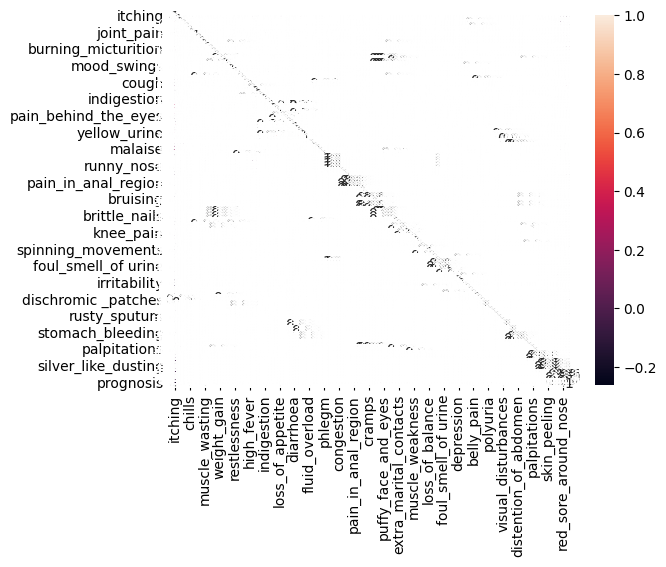

In [41]:
sns.heatmap(df.corr(),annot=True)

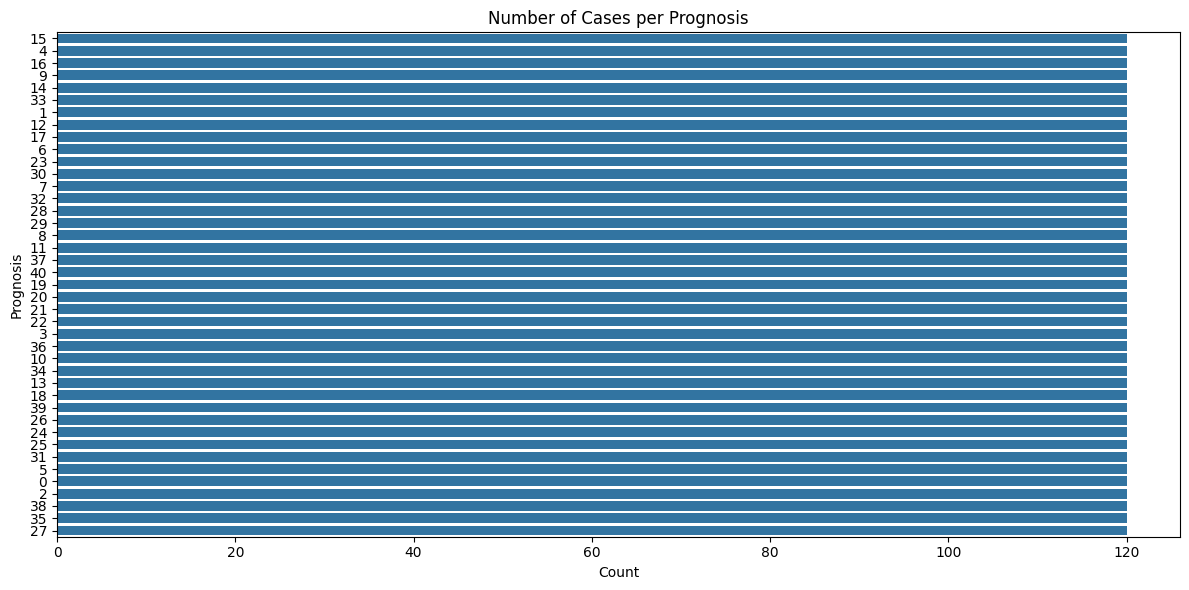

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(y='prognosis', data=df, order=df['prognosis'].value_counts().index)
plt.title('Number of Cases per Prognosis')
plt.xlabel('Count')
plt.ylabel('Prognosis')
plt.tight_layout()
plt.show()

In [43]:
max(Y)

np.int64(40)

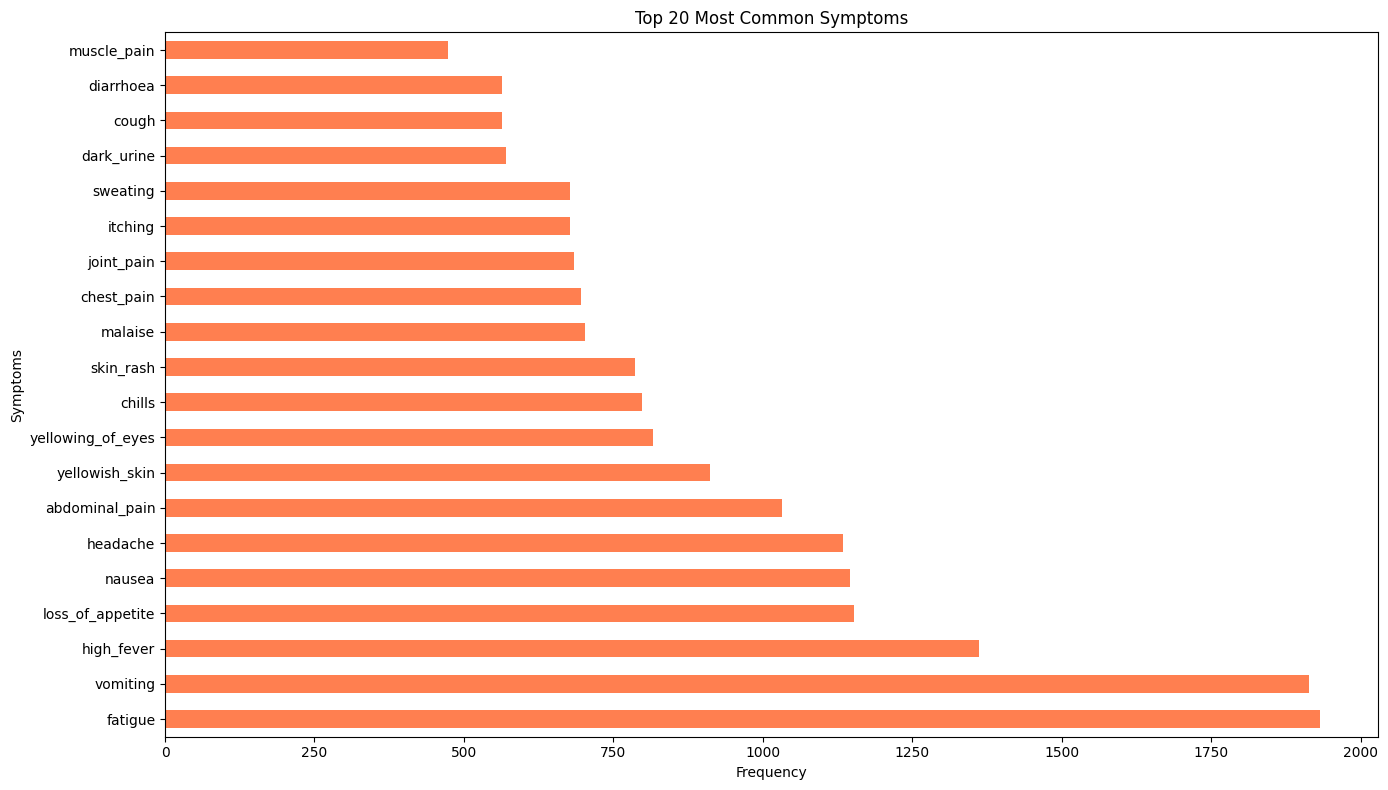

In [45]:
# Top 20 Most Common Symptoms
symptom_cols = df.columns[:-1]
symptom_counts = df[symptom_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
symptom_counts.head(20).plot(kind='barh', color='coral')
plt.title('Top 20 Most Common Symptoms')
plt.xlabel('Frequency')
plt.ylabel('Symptoms')
plt.tight_layout()
plt.show()

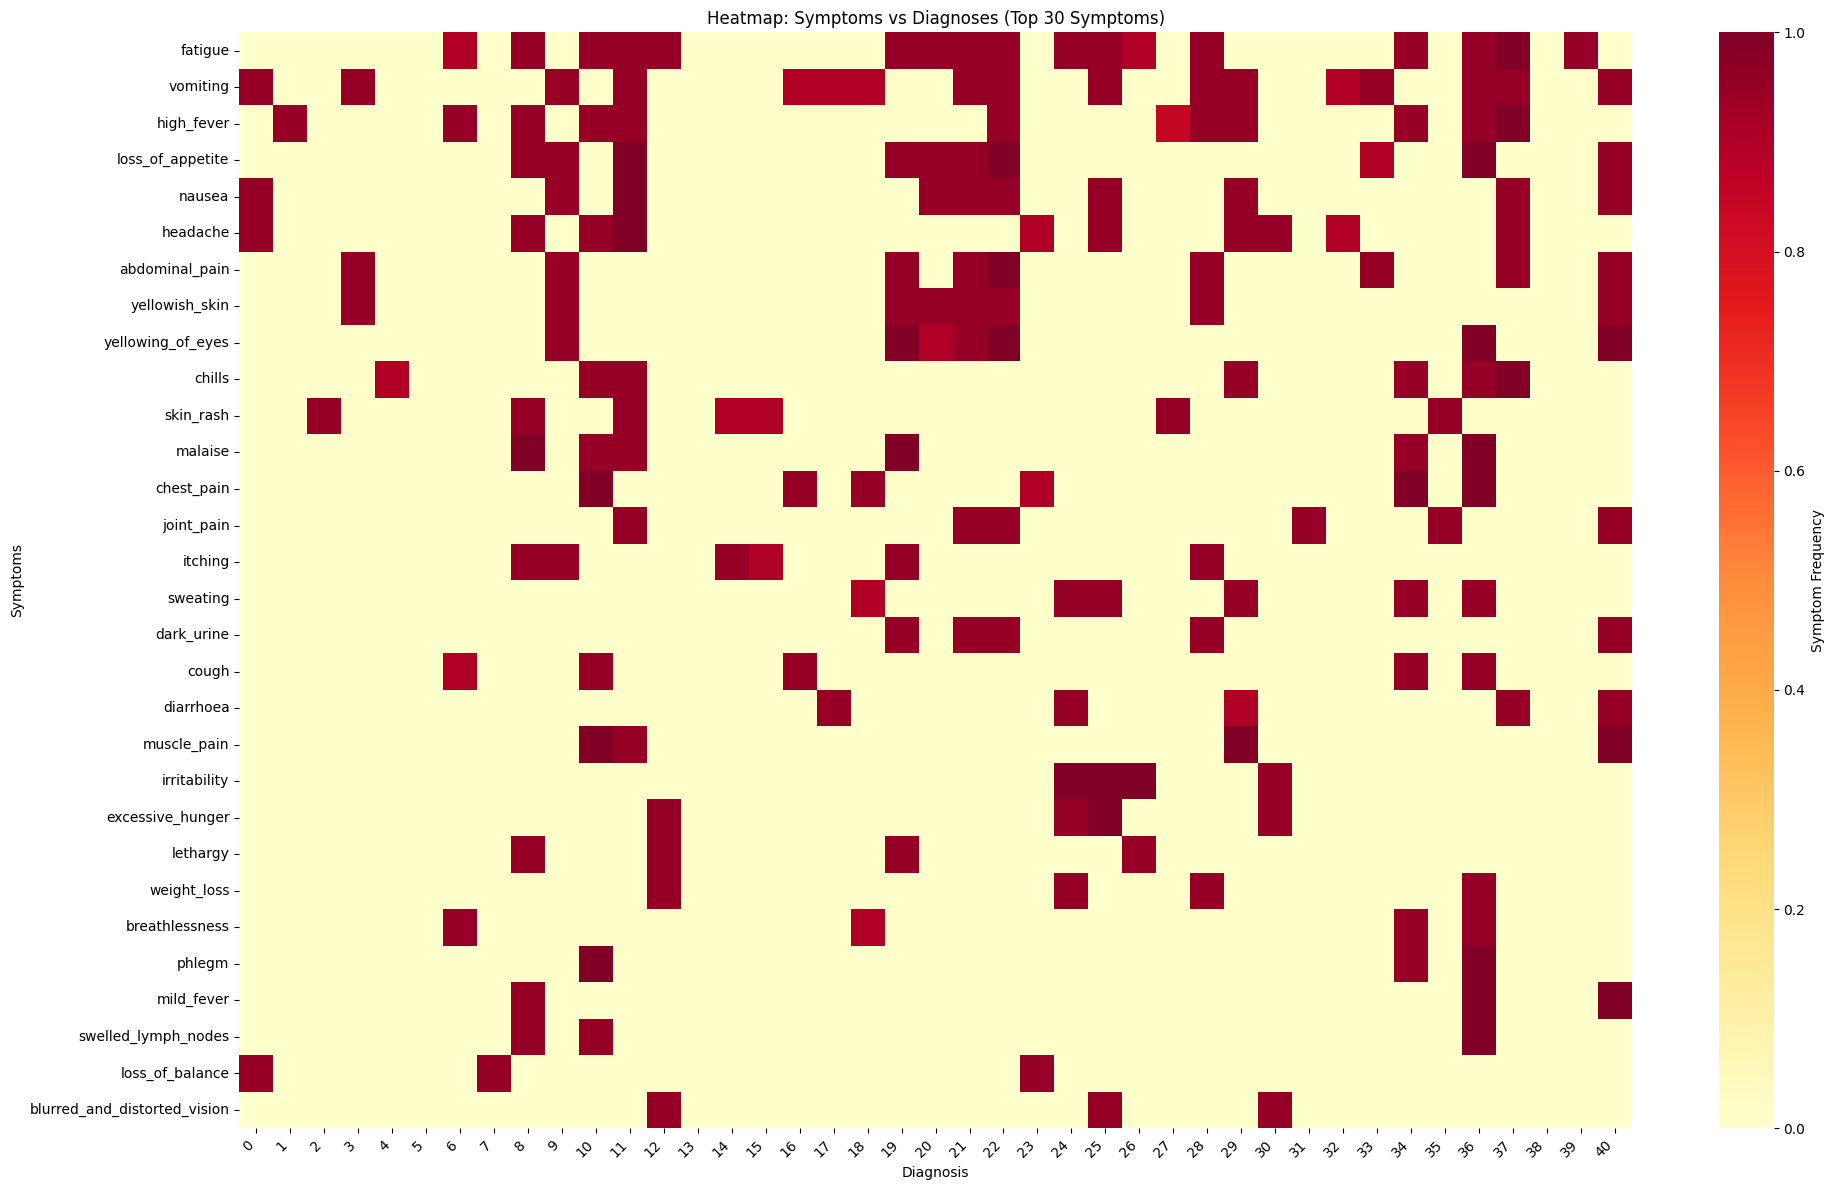

In [ ]:
#  Heatmap of Symptoms by Diagnosis
plt.figure(figsize=(20, 12))
diagnosis_symptoms = df.groupby('prognosis')[symptom_cols].mean()
# Select top 30 symptoms for readability
top_symptoms = symptom_counts.head(30).index
sns.heatmap(diagnosis_symptoms[top_symptoms].T, 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Symptom Frequency'})
plt.title('Heatmap: Symptoms vs Diagnoses (Top 30 Symptoms)')
plt.xlabel('Diagnosis')
plt.ylabel('Symptoms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

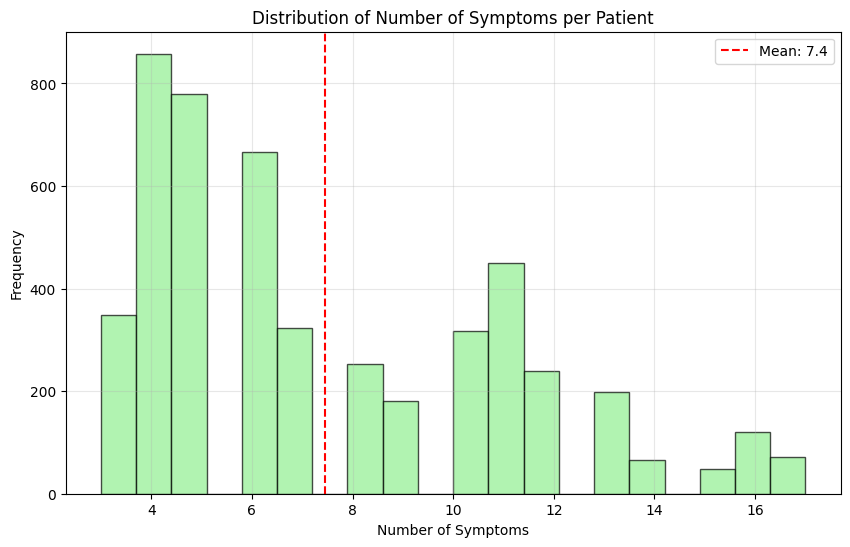

In [46]:
# Distribution of Number of Symptoms per Patient
plt.figure(figsize=(10, 6))
symptoms_per_patient = df[symptom_cols].sum(axis=1)
plt.hist(symptoms_per_patient, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Number of Symptoms per Patient')
plt.xlabel('Number of Symptoms')
plt.ylabel('Frequency')
plt.axvline(symptoms_per_patient.mean(), color='red', linestyle='--', 
            label=f'Mean: {symptoms_per_patient.mean():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\SANDILYA SUNDRAM\AppData\Local\Temp\ipykernel_13660\2465462879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_symptoms, x='prognosis', y='total_symptoms', palette='Set3')


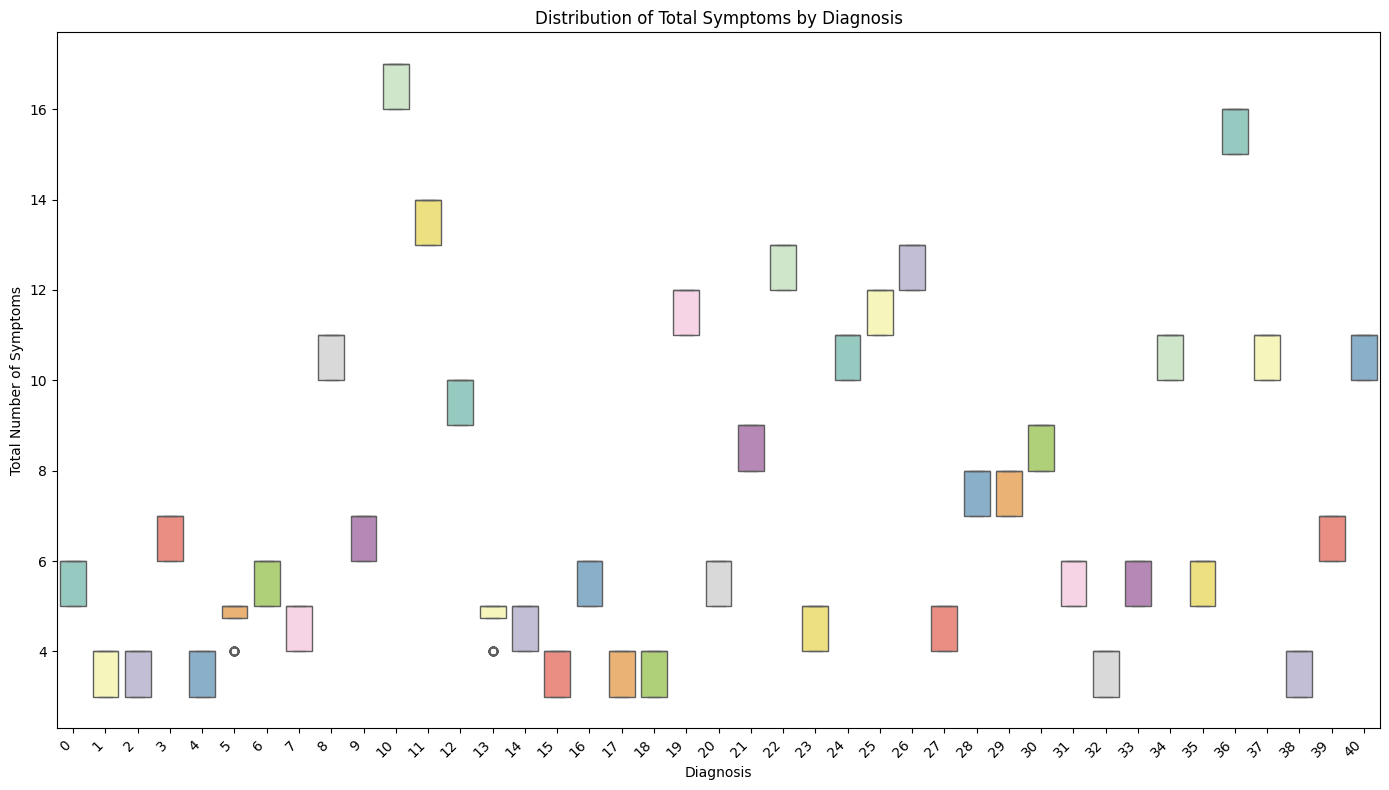

In [ ]:
# Box plot of Symptoms per Diagnosis
plt.figure(figsize=(14, 8))
df_symptoms = df.copy()
df_symptoms['total_symptoms'] = df[symptom_cols].sum(axis=1)
sns.boxplot(data=df_symptoms, x='prognosis', y='total_symptoms', palette='Set3')
plt.title('Distribution of Total Symptoms by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Total Number of Symptoms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

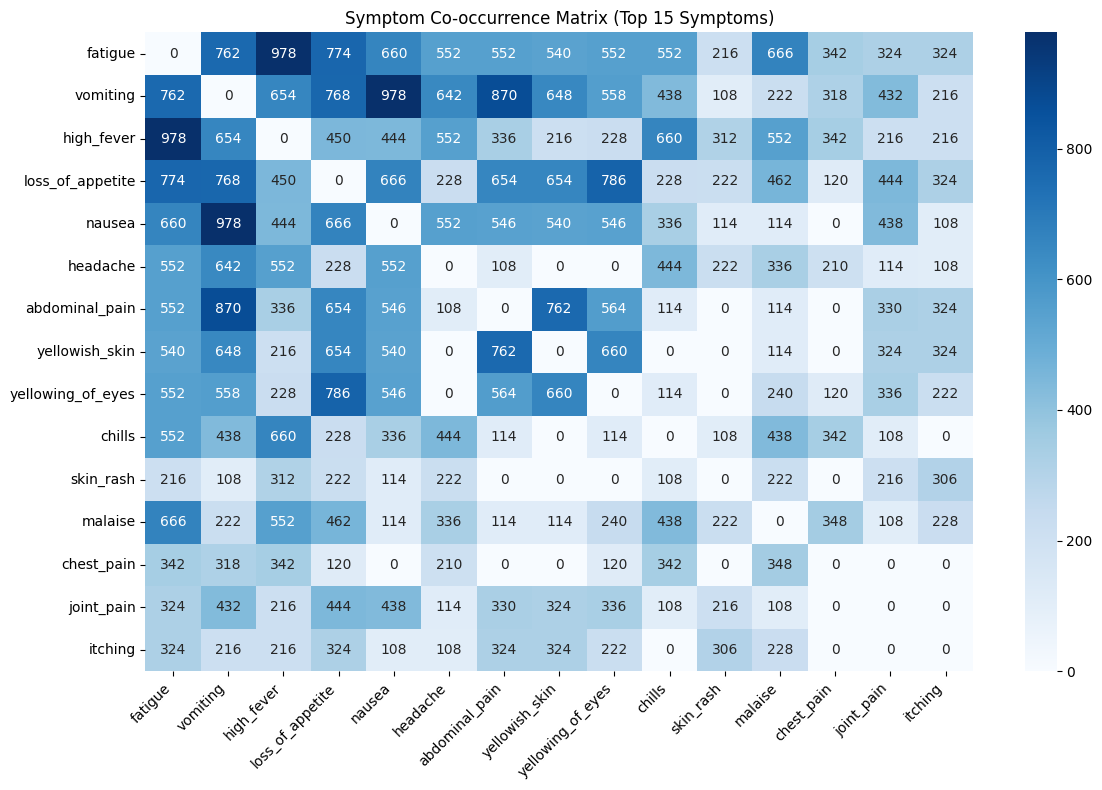

In [47]:
# Calculate co-occurrence for top 15 symptoms

from itertools import combinations
plt.figure(figsize=(12, 8))

top_15_symptoms = symptom_counts.head(15).index
cooccurrence_matrix = np.zeros((len(top_15_symptoms), len(top_15_symptoms)))

for i, symptom1 in enumerate(top_15_symptoms):
    for j, symptom2 in enumerate(top_15_symptoms):
        if i != j:
            cooccurrence = ((df[symptom1] == 1) & (df[symptom2] == 1)).sum()
            cooccurrence_matrix[i][j] = cooccurrence

sns.heatmap(cooccurrence_matrix, 
            xticklabels=top_15_symptoms, 
            yticklabels=top_15_symptoms,
            annot=True, 
            fmt='g',
            cmap='Blues')
plt.title('Symptom Co-occurrence Matrix (Top 15 Symptoms)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

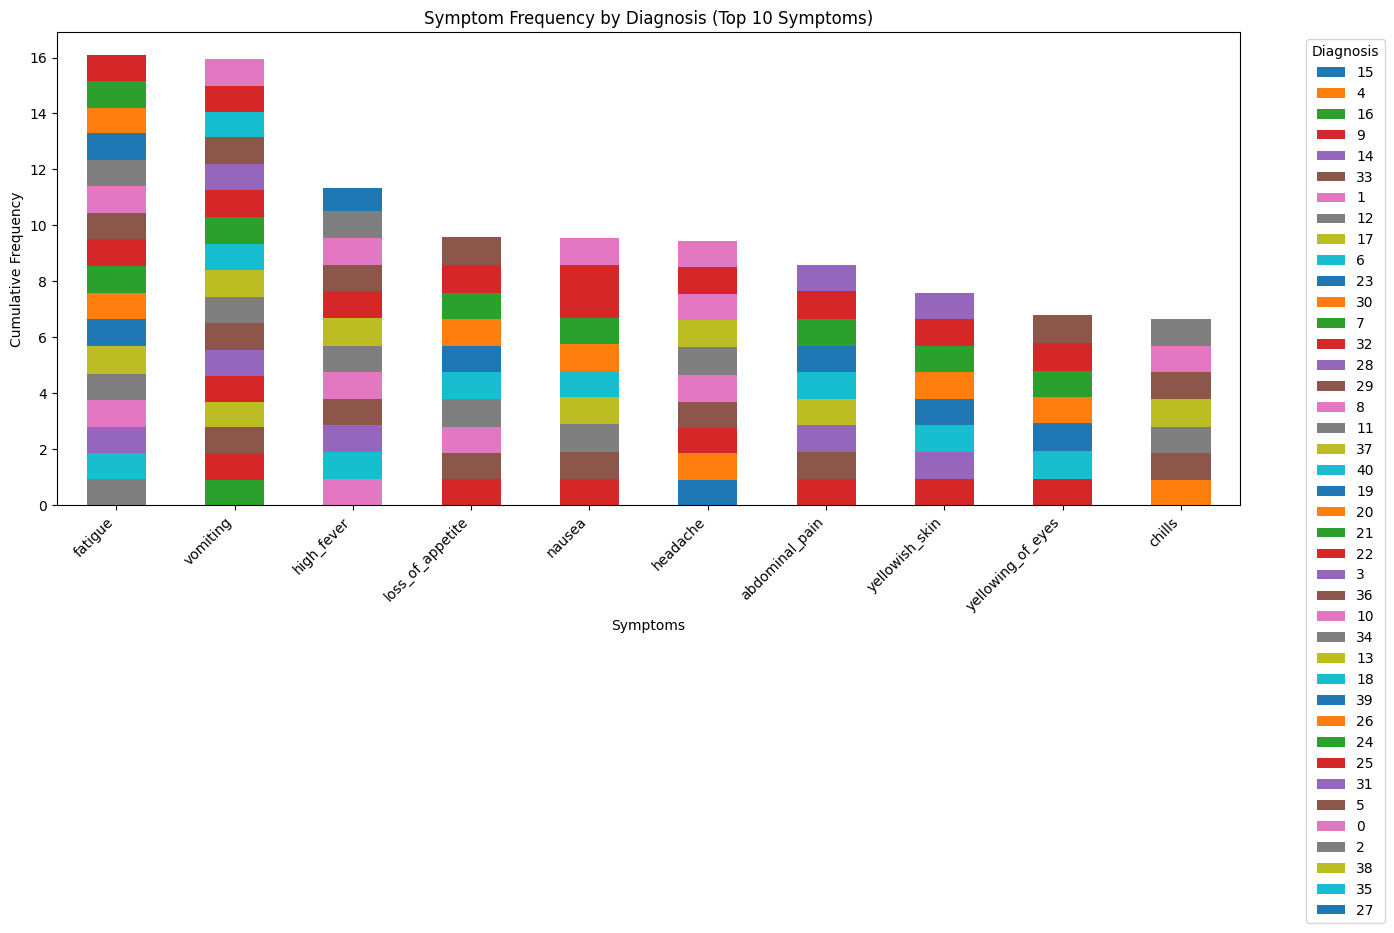

In [ ]:
# Stacked Bar Chart: Symptoms by Diagnosis
 
plt.figure(figsize=(16, 10))
diagnosis_list = df['prognosis'].unique()
top_10_symptoms = symptom_counts.head(10).index

plot_data = []
for diagnosis in diagnosis_list:
    diagnosis_data = df[df['prognosis'] == diagnosis]
    symptom_means = diagnosis_data[top_10_symptoms].mean()
    plot_data.append(symptom_means.values)

plot_df = pd.DataFrame(plot_data, 
                      index=diagnosis_list, 
                      columns=top_10_symptoms)

plot_df.T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Symptom Frequency by Diagnosis (Top 10 Symptoms)')
plt.xlabel('Symptoms')
plt.ylabel('Cumulative Frequency')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

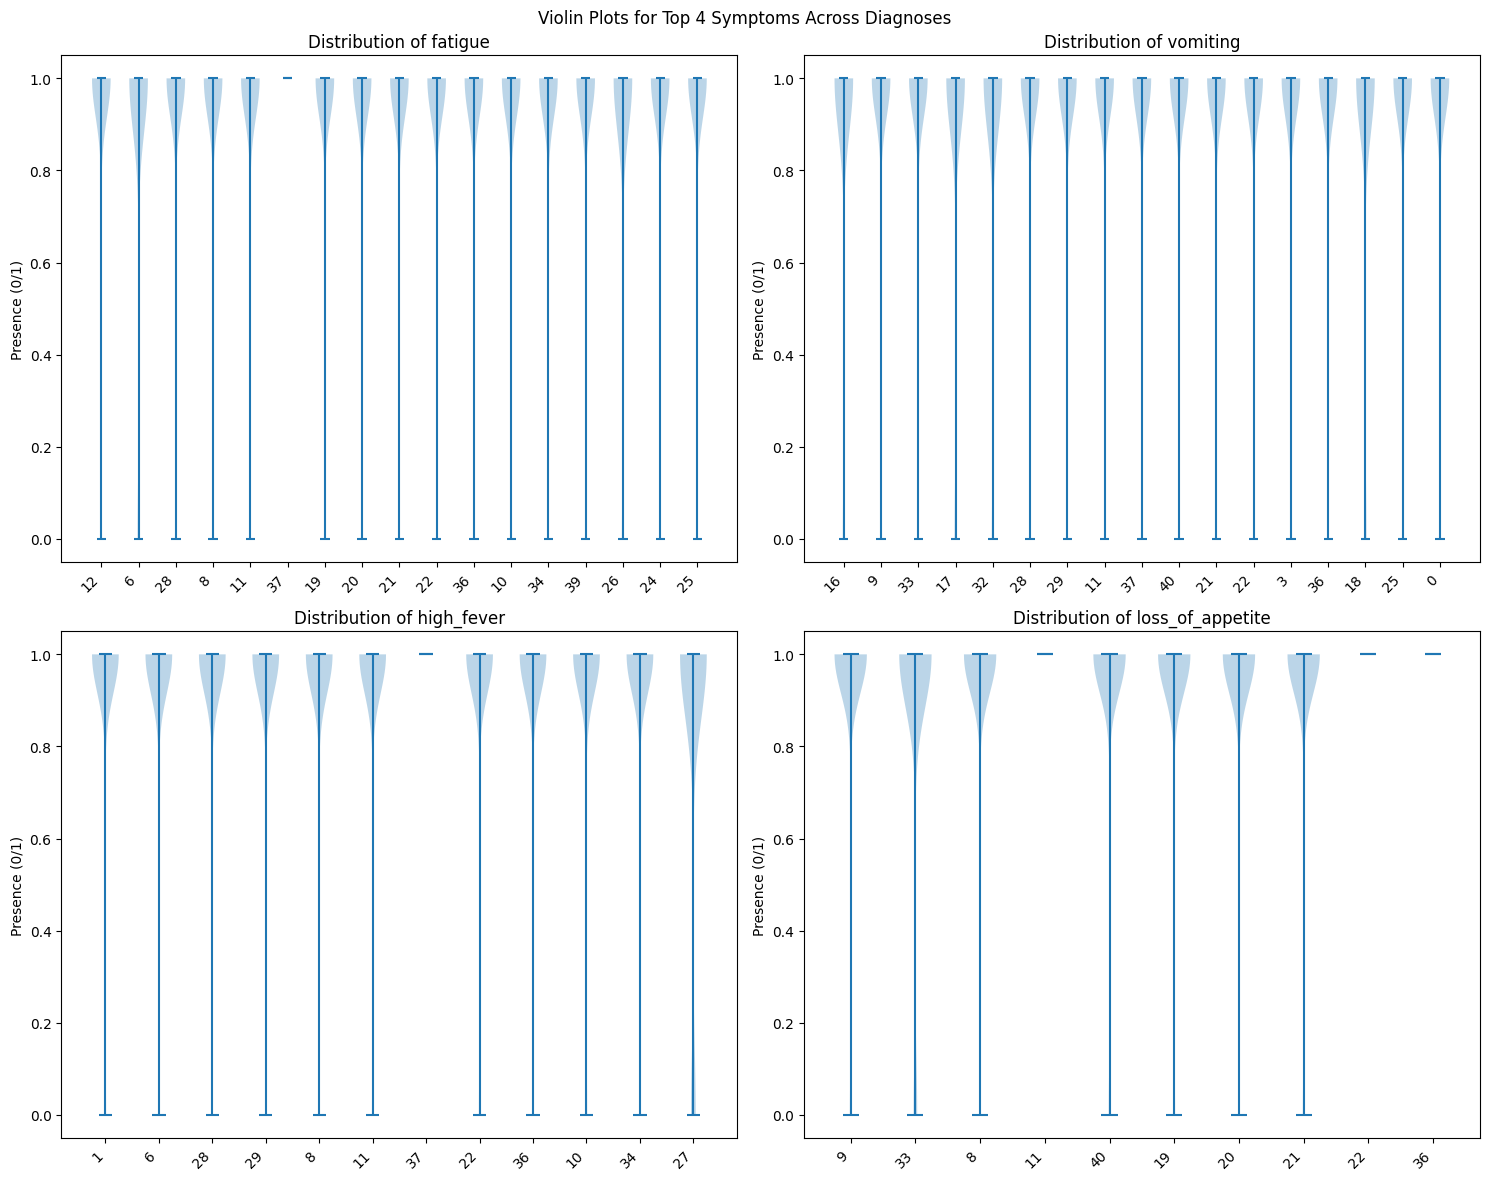

In [48]:
# Violin Plot for Selected Symptoms
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
top_4_symptoms = symptom_counts.head(4).index

for i, symptom in enumerate(top_4_symptoms):
    ax = axes[i//2, i%2]
    
    # Create data for violin plot
    symptom_data = []
    labels = []
    for diagnosis in df['prognosis'].unique():
        diagnosis_symptom = df[df['prognosis'] == diagnosis][symptom]
        if diagnosis_symptom.sum() > 0:  # Only include if symptom is present
            symptom_data.append(diagnosis_symptom)
            labels.append(diagnosis)
    
    if symptom_data:
        ax.violinplot(symptom_data)
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=45, ha='right')
        ax.set_title(f'Distribution of {symptom}')
        ax.set_ylabel('Presence (0/1)')

plt.suptitle('Violin Plots for Top 4 Symptoms Across Diagnoses')
plt.tight_layout()
plt.show()

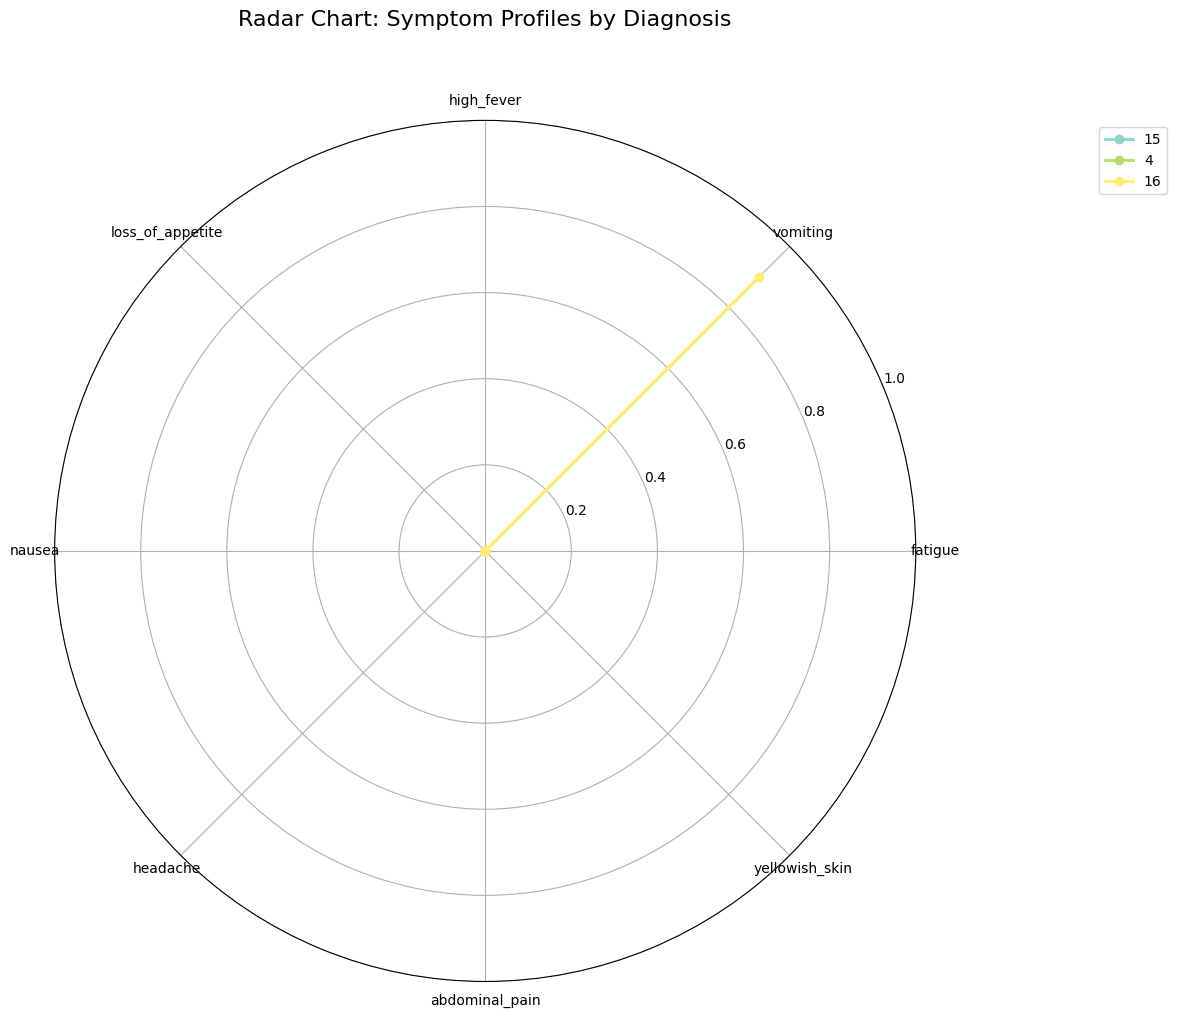

All plots have been generated successfully!
Dataset shape: (4920, 133)
Number of unique diagnoses: 41
Number of symptoms: 132


In [ ]:
# Radar Chart for Diagnosis Comparison (using top symptoms)
from math import pi

def create_radar_chart(diagnosis_list, symptoms_list, df):
    angles = [n / len(symptoms_list) * 2 * pi for n in range(len(symptoms_list))]
    angles += angles[:1]  # Complete the circle
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(diagnosis_list)))
    
    for i, diagnosis in enumerate(diagnosis_list):
        diagnosis_data = df[df['prognosis'] == diagnosis]
        values = diagnosis_data[symptoms_list].mean().tolist()
        values += values[:1]  # Complete the circle
        
        ax.plot(angles, values, 'o-', linewidth=2, label=diagnosis, color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(symptoms_list)
    ax.set_ylim(0, 1)
    ax.set_title('Radar Chart: Symptom Profiles by Diagnosis', size=16, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    return fig

# Select top 8 symptoms and first 3 diagnoses for readability
top_8_symptoms = symptom_counts.head(8).index.tolist()
first_3_diagnoses = df['prognosis'].unique()[:3]

radar_fig = create_radar_chart(first_3_diagnoses, top_8_symptoms, df)
plt.tight_layout()
plt.show()

print("All plots have been generated successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of unique diagnoses: {df['prognosis'].nunique()}")
print(f"Number of symptoms: {len(symptom_cols)}")

<Figure size 1600x1200 with 0 Axes>

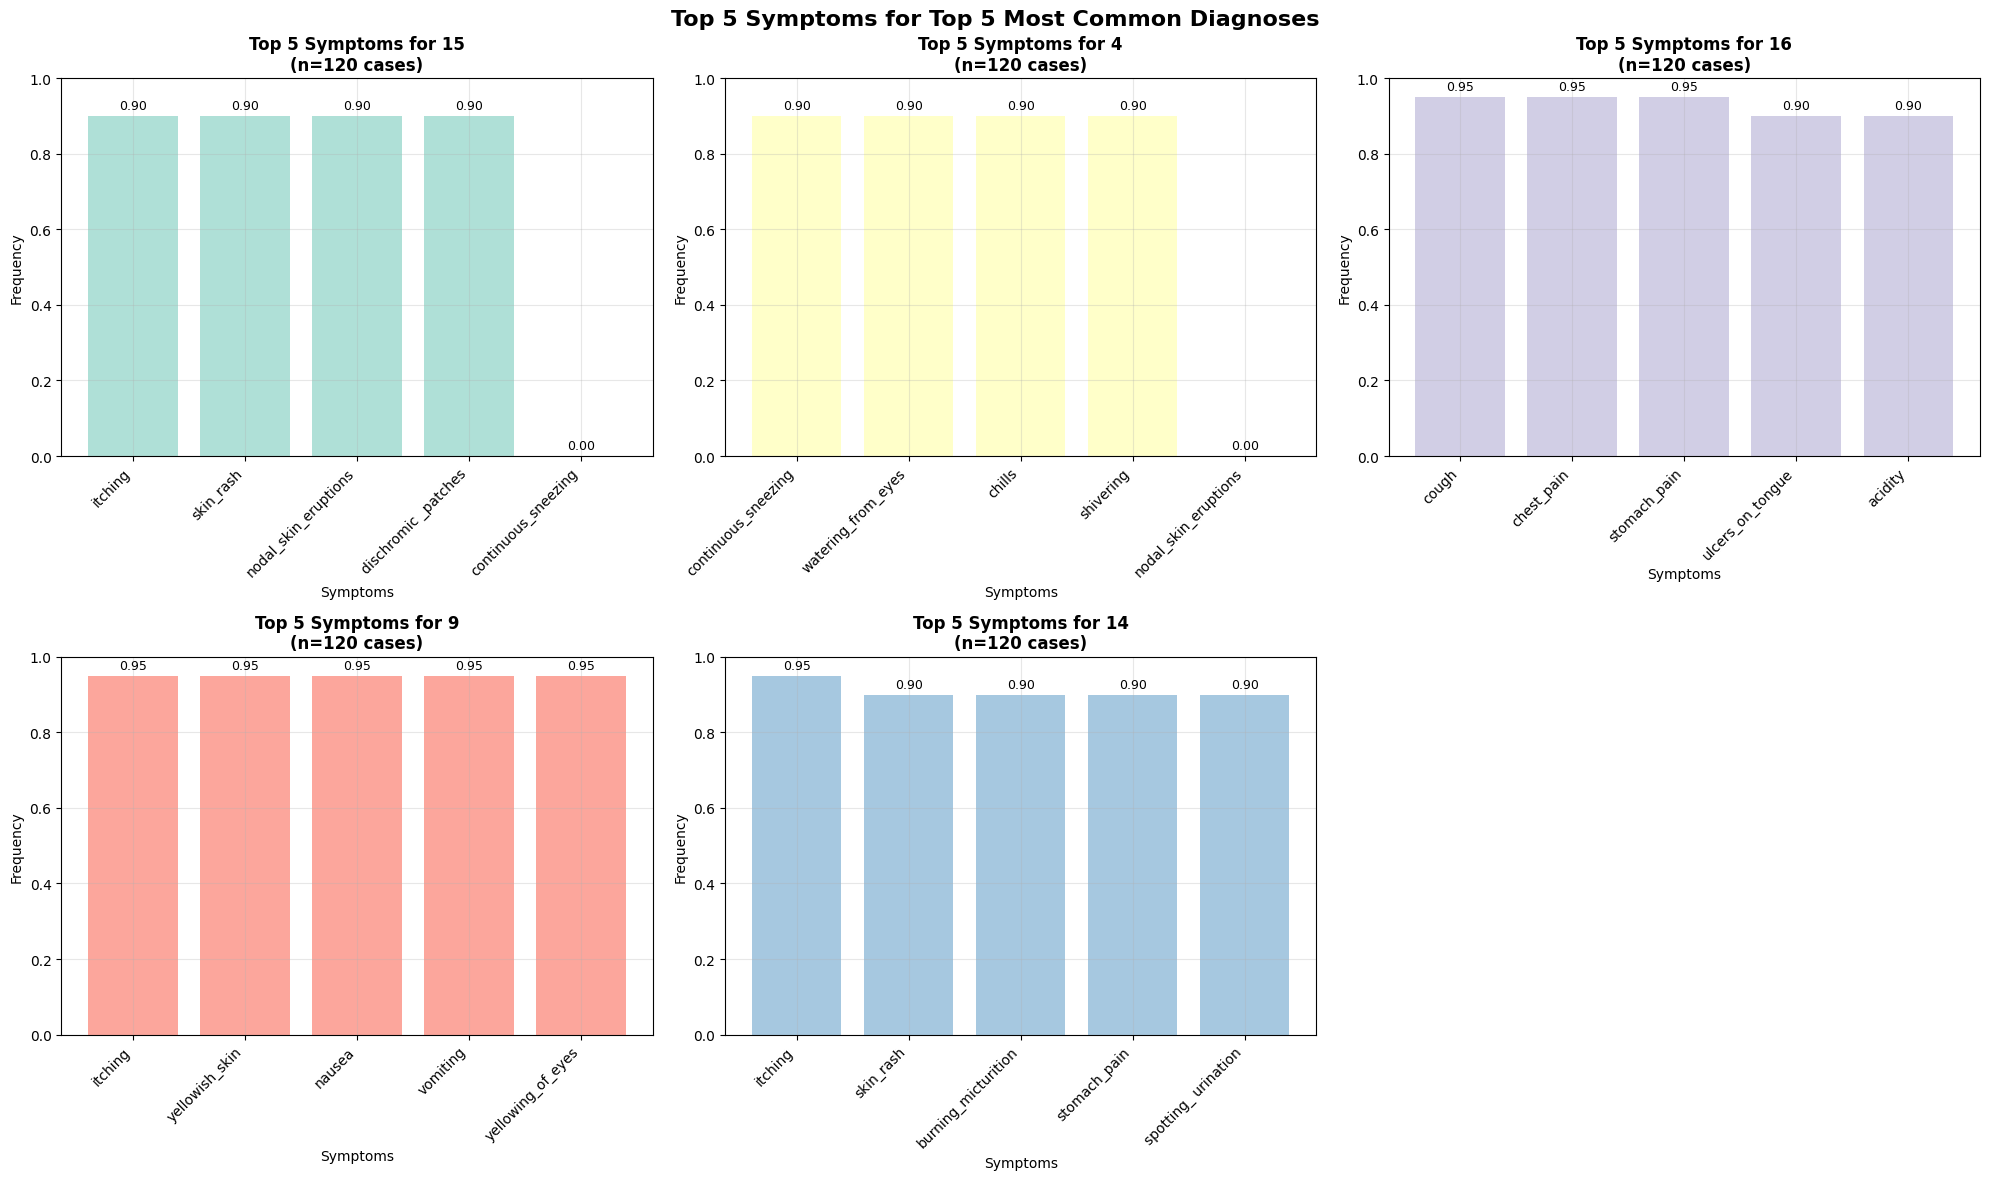

In [61]:
# Top 5 Symptoms for Top 5 Most Common Diagnoses
plt.figure(figsize=(16, 12))
# Count number of cases per diagnosis
diagnosis_counts = df['prognosis'].value_counts()
top_5_diagnoses = diagnosis_counts.head(5).index

# Creating subplots for each diagnosis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, diagnosis in enumerate(top_5_diagnoses):
    diagnosis_data = df[df['prognosis'] == diagnosis]
    diagnosis_symptom_freq = diagnosis_data[symptom_cols].mean().sort_values(ascending=False)
    top_5_symptoms = diagnosis_symptom_freq.head(5)
    ax = axes[i]
    bars = ax.bar(range(len(top_5_symptoms)), top_5_symptoms.values, 
                  color=plt.cm.Set3(i), alpha=0.7)
    ax.set_title(f'Top 5 Symptoms for {diagnosis}\n(n={diagnosis_counts[diagnosis]} cases)', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Symptoms')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(top_5_symptoms)))
    ax.set_xticklabels(top_5_symptoms.index, rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 1)
    
    # Add value labels on bars
    for bar, value in zip(bars, top_5_symptoms.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.2f}', ha='center', va='bottom', fontsize=9)
    
    ax.grid(True, alpha=0.3)

# Removing empty subplot
axes[5].remove()

plt.suptitle('Top 5 Symptoms for Top 5 Most Common Diagnoses', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Model training

In [50]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [52]:
models = {
    'Svc' : SVC(kernel='linear'),
    'Random_Forest' : RandomForestClassifier(n_estimators=100,random_state=28),
    'Gradient_Boosting' : GradientBoostingClassifier(n_estimators=100,random_state=28),
    'Kneighbours' : KNeighborsClassifier(n_neighbors=5),
    'Multinomial_naive_bayes' : MultinomialNB()
}

for model_name, model in models.items():
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    cm = confusion_matrix(y_test,predictions)

    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} Confusion Matrix : ")
    print(np.array2string(cm,separator=','))

Svc accuracy : 1.0
Svc Confusion Matrix : 
[[32, 0, 0,..., 0, 0, 0],
 [ 0,40, 0,..., 0, 0, 0],
 [ 0, 0,40,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,33, 0, 0],
 [ 0, 0, 0,..., 0,38, 0],
 [ 0, 0, 0,..., 0, 0,34]]
Random_Forest accuracy : 1.0
Random_Forest Confusion Matrix : 
[[32, 0, 0,..., 0, 0, 0],
 [ 0,40, 0,..., 0, 0, 0],
 [ 0, 0,40,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,33, 0, 0],
 [ 0, 0, 0,..., 0,38, 0],
 [ 0, 0, 0,..., 0, 0,34]]
Gradient_Boosting accuracy : 1.0
Gradient_Boosting Confusion Matrix : 
[[32, 0, 0,..., 0, 0, 0],
 [ 0,40, 0,..., 0, 0, 0],
 [ 0, 0,40,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,33, 0, 0],
 [ 0, 0, 0,..., 0,38, 0],
 [ 0, 0, 0,..., 0, 0,34]]
Kneighbours accuracy : 1.0
Kneighbours Confusion Matrix : 
[[32, 0, 0,..., 0, 0, 0],
 [ 0,40, 0,..., 0, 0, 0],
 [ 0, 0,40,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,33, 0, 0],
 [ 0, 0, 0,..., 0,38, 0],
 [ 0, 0, 0,..., 0, 0,34]]
Multinomial_naive_bayes accuracy : 1.0
Multinomial_naive_bayes Confusion Matrix : 
[[32, 0, 0,..., 0, 0, 0],
 [ 0,40

In [53]:
import pickle
pickle.dump(models['Svc'], open('SVC.pkl', 'wb'))

In [54]:
svc = pickle.load(open('SVC.pkl','rb'))


In [55]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [9]
Actual Disease : 9


c:\Users\SANDILYA SUNDRAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [56]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [27]
Actual Disease : 27


c:\Users\SANDILYA SUNDRAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [62]:
symptoms = pd.read_csv('symtoms_df.csv')
precautions = pd.read_csv('precautions_df.csv')
workout = pd.read_csv('workout_df.csv')
description = pd.read_csv('description.csv')
medications = pd.read_csv('medications.csv')
diets = pd.read_csv('diets.csv')

In [63]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [64]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


c:\Users\SANDILYA SUNDRAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [68]:
# Test 2
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
Allergy
=================description==================
Allergy is an immune system reaction to a substance in the environment.
=================precautions==================
1 :  apply calamine
2 :  cover area with bandage
3 :  nan
4 :  use ice to compress itching
=================medications==================
5 :  ['Antihistamines', 'Decongestants', 'Epinephrine', 'Corticosteroids', 'Immunotherapy']
=================workout==================
6 :  Avoid allergenic foods
7 :  Consume anti-inflammatory foods
8 :  Include omega-3 fatty acids
9 :  Stay hydrated
10 :  Eat foods rich in vitamin C
11 :  Include quercetin-rich foods
12 :  Consume local honey
13 :  Limit processed foods
14 :  Include ginger in diet
15 :  Avoid artificial additives
=================diets==================
16 :  ['Elimination Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']


c:\Users\SANDILYA SUNDRAM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [74]:
# Strip column names
description.columns = description.columns.str.strip()

# Get description
desc_series = description[description['Disease'] == predicted_disease]['Description']

# Convert to string
desc = " ".join(desc_series.values)


In [77]:
import sklearn
print(sklearn.__version__)

1.6.1
